## Importing the Libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
features = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
df = df[features]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [4]:
df = df.rename(columns={'MSRP': 'price'})
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [5]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [7]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

## Data Preprocessing and Feature Engineering 

In [8]:
df['engine_hp'] = df['engine_hp'].fillna(0)
df['engine_cylinders'] = df['engine_cylinders'].fillna(0)

In [9]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [10]:
numerical = ['engine_hp','engine_cylinders','highway_mpg','city_mpg']
categorical = ['make', 'model','transmission_type','vehicle_style','year']

In [11]:
df[numerical].corr()

,engine_hp,engine_cylinders,highway_mpg,city_mpg
engine_hp,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,-0.415707,-0.614541,1.000000,0.886829
city_mpg,-0.424918,-0.587306,0.886829,1.000000


In [12]:
data = df.copy()
mean = data['price'].mean()

data['above_average'] = np.where(data['price']>=mean,1,0)

data = data.drop(['price'], axis=1)

data


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


In [13]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [14]:
y.isna().sum()

0

In [15]:
from sklearn.model_selection import train_test_split
X_full_train, X_val, y_full_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_full_train, y_full_train, test_size=0.25, shuffle=True, random_state=1)

In [16]:
X_train.shape, X_val.shape, X_test.shape

((7148, 9), (2383, 9), (2383, 9))

## AOC Score for numerical data

In [17]:
from sklearn.metrics import roc_auc_score
roc_auc = pd.DataFrame(columns=['feature name', 'roc_auc_score'])
target = y_train.copy()
for i in numerical:
    val = roc_auc_score(target, X_train[i])
    if val < 0.5:
        val = 1 - val
    model1_data = {'feature name': i , 'roc_auc_score': val}
    roc_auc = pd.concat([roc_auc, pd.DataFrame([model1_data])], ignore_index=True)

roc_auc

/tmp/ipykernel_202158/980444815.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  roc_auc = pd.concat([roc_auc, pd.DataFrame([model1_data])], ignore_index=True)


,feature name,roc_auc_score
0,engine_hp,0.917103
1,engine_cylinders,0.766116
2,highway_mpg,0.633059
3,city_mpg,0.673424


## Evaluation metrics

In [18]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_dict = X.to_dict(orient='records')


X_dict = dv.fit_transform(data_dict)


In [19]:
len(X_dict)

11914

In [20]:
from sklearn.model_selection import train_test_split
X_full_train, X_val, y_full_train, y_val = train_test_split(X_dict, y, test_size=0.2, shuffle=True, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_full_train, y_full_train, test_size=0.25, shuffle=True, random_state=1)

In [21]:
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [22]:
X_train.shape, X_val.shape, X_test.shape

((7148, 989), (2383, 989), (2383, 989))

In [23]:
y_train.shape, y_val.shape, y_test.shape

((7148,), (2383,), (2383,))

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
y_probs = lr.predict_proba(X_val)

In [25]:
df_pred = pd.DataFrame()
df_pred['prob0'] = y_probs[:,0]
df_pred['prob1'] = y_probs[:,1]
df_pred['predicted'] = y_pred
df_pred['actual'] = y_val
df_pred['correct_preds'] = (df_pred['actual'] == df_pred['predicted'])
df_pred

,prob0,prob1,predicted,actual,correct_preds
0,2.675746e-03,0.997324,1,1,True
1,2.138370e-03,0.997862,1,1,True
2,8.843918e-01,0.115608,0,0,True
3,9.999383e-01,0.000062,0,0,True
4,9.911906e-01,0.008809,0,0,True
...,...,...,...,...,...
2378,9.720932e-01,0.027907,0,0,True
2379,4.443011e-04,0.999556,1,1,True
2380,9.039979e-01,0.096002,0,0,True
2381,3.134266e-07,1.000000,1,1,True


In [26]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_probs[:,1])
print(f"AUC score : {round(auc_score, 3)}")

AUC score : 0.979


In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.9290809903483005

In [28]:
thresholds = np.arange(0.0, 1.01, 0.01)
scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    # print('%.2f %.3f' % (t, score))
    scores.append(score)

## Accuracy Score

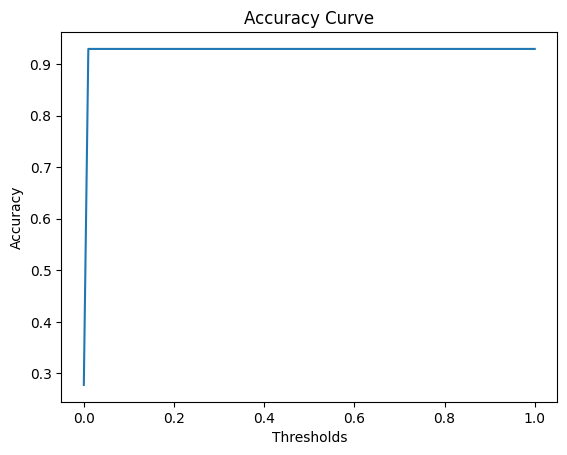

In [29]:
plt.plot(thresholds, scores)
plt.xlabel('Thresholds')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()

## Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

cm = confusion_matrix(y_pred, y_val)
p = precision_score(y_pred, y_val)
r = recall_score(y_pred, y_val)
f1 = f1_score(y_pred, y_val)

print(f"Confusion Matrix : \n {cm}")
print(f"Precision : {p} | Recall : {r} | F1 Score : {f1}")

Confusion Matrix : 
 [[1660  108]
 [  61  554]]
Precision : 0.8368580060422961 | Recall : 0.9008130081300812 | F1 Score : 0.8676585747846516


In [31]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 100)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['precision'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
    df_scores['recall'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

## Precision - Recall curve

In [32]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, roc_curve, f1_score

thresholds = np.arange(0, 1.01, 0.01)
predictions = y_pred
true_labels = y_val

precisions = []
recalls = []
f1score = []
fprs = []
tprs = []

for threshold in thresholds:
    # Threshold predictions
    thresholded_predictions = (predictions >= threshold).astype(int)
    
    # Calculate precision and recall
    precision = precision_score(true_labels, thresholded_predictions)
    recall = recall_score(true_labels, thresholded_predictions)
    f1 = f1_score(true_labels, thresholded_predictions)
    fpr, tpr, threshold = roc_curve(true_labels, thresholded_predictions)
    
    # Append to lists
    precisions.append(precision)
    recalls.append(recall)
    fprs.append(fpr)
    tprs.append(tpr)
    f1score.append(f1)

# Find the threshold where precision and recall are closest
closest_point_index = np.argmin(np.abs(np.array(precisions) - np.array(recalls)))
optimal_threshold = thresholds[closest_point_index]
optimal_precision = precisions[closest_point_index]
optimal_recall = recalls[closest_point_index]
optimal_f1score = f1score[closest_point_index]

print("Optimal Threshold:", optimal_threshold)
print("Precision at Optimal Threshold:", optimal_precision)
print("Recall at Optimal Threshold:", optimal_recall)
print("F1 Score at Optimal Threshold:", optimal_f1score)

Optimal Threshold: 0.01
Precision at Optimal Threshold: 0.9008130081300812
Recall at Optimal Threshold: 0.8368580060422961
F1 Score at Optimal Threshold: 0.8676585747846516


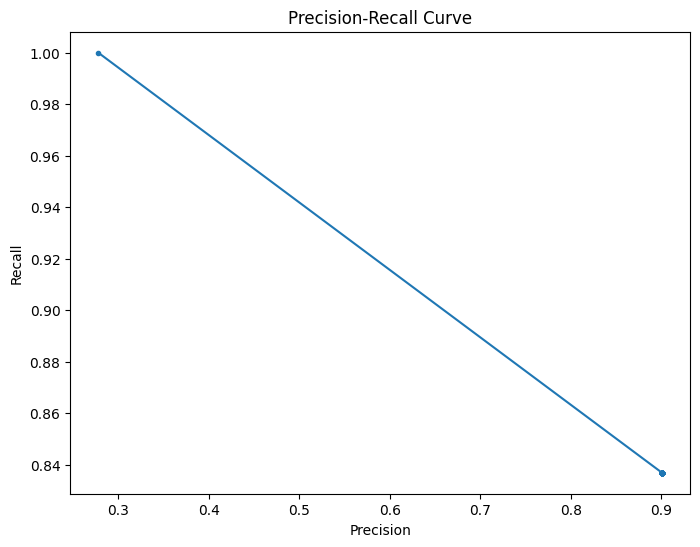

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(precisions, recalls, marker='.')
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## ROC characteristic curve

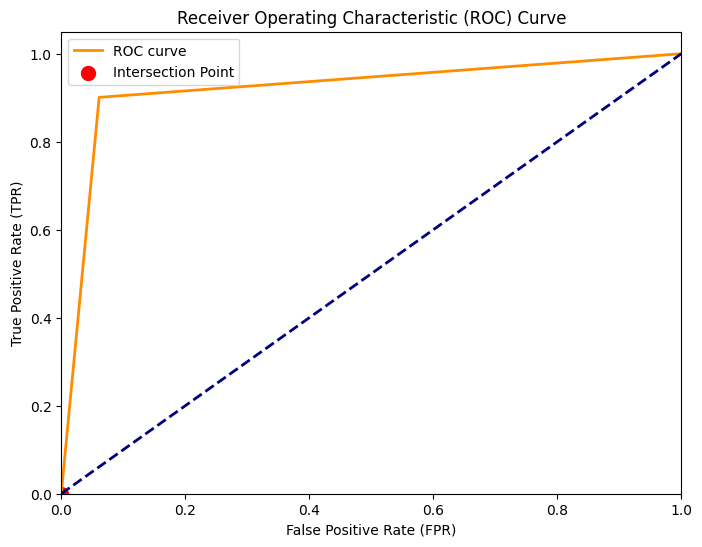

Threshold where precision and recall intersect: 1.00


In [34]:
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Replace with your actual model predictions and true labels
predictions = y_pred
true_labels = y_val

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(predictions, true_labels)

# Calculate the precision-recall curve
precision, recall, pr_thresholds = precision_recall_curve(predictions, true_labels)

# Find the threshold where precision and recall intersect (closest to top-left)
min_distance = float('inf')
best_threshold = None
for i in range(len(thresholds)):
    distance = np.abs(precision[i] - recall[i])
    if distance < min_distance:
        min_distance = distance
        best_threshold = thresholds[i]

# Plot the ROC curve and highlight the intersection point
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Mark the intersection point
plt.scatter(fpr[np.argmin(min_distance)], tpr[np.argmin(min_distance)], color='red', s=100, label='Intersection Point')
plt.legend()

plt.show()

# The 'best_threshold' variable will contain the threshold where precision and recall intersect
print(f"Threshold where precision and recall intersect: {best_threshold:.2f}")

In [35]:
from sklearn.model_selection import train_test_split
X_full_train, X_val, y_full_train, y_val = train_test_split(X_dict, y, test_size=0.2, shuffle=True, random_state=1)

In [36]:
y_full_train

2711     1
333      0
9377     0
939      1
5675     0
        ..
7813     1
10955    1
905      0
5192     0
235      0
Name: above_average, Length: 9531, dtype: int64

In [37]:
!pip install tqdm

## K-Fold Cross validation

In [38]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [40]:
# Specify the number of splits (k) for K-Fold Cross-Validation
k = 5  # You can choose the desired number of folds

# Initialize a model (e.g., logistic regression)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000) # Replace with your chosen model

# Initialize KFold with the desired number of splits
kf = KFold(n_splits=k, shuffle=True, random_state=1)  # You can set a random state for reproducibility

# Create lists to store evaluation metrics
accuracies = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X_dict):
    X_train, X_test = X_dict[train_index], X_dict[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model (you can use other metrics as well)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate the mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

# Print the results
print(f'Accuracy for each fold: {accuracies}')
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

Accuracy for each fold: [0.9320184641208561, 0.9257238774653798, 0.9412505245488879, 0.9349559378934117, 0.9231738035264484]
Mean Accuracy: 0.93
Standard Deviation: 0.01


In [41]:
for c in tqdm([0.01, 0.1, 0.5, 10]):

    # Specify the number of splits (k) for K-Fold Cross-Validation
    k = 5  # You can choose the desired number of folds
    
    # Initialize a model (e.g., logistic regression)
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000) # Replace with your chosen model
    
    # Initialize KFold with the desired number of splits
    kf = KFold(n_splits=k, shuffle=True, random_state=1)  # You can set a random state for reproducibility
    
    # Create lists to store evaluation metrics
    accuracies = []
    
    # Perform K-Fold Cross-Validation
    for train_index, test_index in kf.split(X_dict):
        X_train, X_test = X_dict[train_index], X_dict[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = model.predict(X_test)
        
        # Evaluate the model (you can use other metrics as well)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    # Calculate the mean and standard deviation of accuracies
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)

    # Print the results
    print(f'C Value : {c}')
    print(f'Accuracy for each fold: {accuracies}')
    print(f'Mean Accuracy: {mean_accuracy:.2f}')
    print(f'Standard Deviation: {std_accuracy:.2f}')



  0%|          | 0/4 [00:00<?, ?it/s]

C Value : 0.01
Accuracy for each fold: [0.892572387746538, 0.8908938313050776, 0.9034830046160303, 0.8904741921947126, 0.8895885810243492]
Mean Accuracy: 0.89
Standard Deviation: 0.01
C Value : 0.1
Accuracy for each fold: [0.916911456147713, 0.9160721779269828, 0.9257238774653798, 0.9211078472513639, 0.9156171284634761]
Mean Accuracy: 0.92
Standard Deviation: 0.00
C Value : 0.5
Accuracy for each fold: [0.9336970205623164, 0.9345362987830466, 0.9278220730172052, 0.9357952161141418, 0.9130982367758187]
Mean Accuracy: 0.93
Standard Deviation: 0.01
C Value : 10
Accuracy for each fold: [0.9370541334452371, 0.9248845992446496, 0.9290809903483005, 0.9299202685690307, 0.9181360201511335]
Mean Accuracy: 0.93
Standard Deviation: 0.01
